

* Nama Lengkap : Fajar Maulana Thaariq A
* Username : alburuuj
* Email : fajarm643@gmail.com
* No Telp : +6289619785254
* Kota Domisili : Kab. Semarang
* Tempat Lahir : Kab. Boyolali
* Tanggal Lahir : 30 Juni 2001
* Pendidikan Terakhir : SMA
* Pekerjaan / Profesi saat ini : Pelajar / Mahasiswa
* Perusahaan/ Institusi saat ini : Institut Teknologi Telkom Purwokerto







In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('coin_Dogecoin.csv')
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.000000e+00,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.000000e+00,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.000000e+00,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.000000e+00,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.000000e+00,7.284337e+06
...,...,...,...,...,...,...,...,...,...,...
2755,2756,Dogecoin,DOGE,2021-07-02 23:59:59,0.247997,0.238848,0.243982,0.245264,1.321471e+09,3.194925e+10
2756,2757,Dogecoin,DOGE,2021-07-03 23:59:59,0.250214,0.242454,0.245106,0.246411,9.170158e+08,3.210491e+10
2757,2758,Dogecoin,DOGE,2021-07-04 23:59:59,0.252567,0.243425,0.246425,0.246483,9.735115e+08,3.211767e+10
2758,2759,Dogecoin,DOGE,2021-07-05 23:59:59,0.246419,0.227838,0.246419,0.231614,1.267949e+09,3.018344e+10


Daftar Variable yang tersedia :


*   Name
*   Symbol
*   Date
*   High
*   Low
*   Open
*   Close
*   Volume
*   Marketcap










In [3]:
# Checking missing values on data
df.info()
print('Total missing value in the dataframe:', df.isnull().sum().sum(), 'records')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2760 non-null   int64  
 1   Name       2760 non-null   object 
 2   Symbol     2760 non-null   object 
 3   Date       2760 non-null   object 
 4   High       2760 non-null   float64
 5   Low        2760 non-null   float64
 6   Open       2760 non-null   float64
 7   Close      2760 non-null   float64
 8   Volume     2760 non-null   float64
 9   Marketcap  2760 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 215.8+ KB
Total missing value in the dataframe: 0 records


Setelah kita cek, Data tidak memiliki Missing Values pada dataset yang kita gunakan

In [4]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2.760000e+03,2.760000e+03
mean,1380.500000,0.014964,0.012402,0.013669,0.013763,4.326321e+08,1.760533e+09
std,796.887696,0.069103,0.055536,0.062347,0.062559,2.807320e+09,8.115186e+09
min,1.000000,0.000089,0.000085,0.000087,0.000087,0.000000e+00,1.509085e+06
25%,690.750000,0.000231,0.000222,0.000227,0.000226,2.536138e+05,2.337892e+07
50%,1380.500000,0.001914,0.001772,0.001849,0.001844,5.582480e+06,2.135789e+08
75%,2070.250000,0.002986,0.002796,0.002900,0.002899,5.098244e+07,3.488812e+08
max,2760.000000,0.737567,0.608168,0.687801,0.684777,6.941068e+10,8.868082e+10


 **catatan informasi**
 * **count** merupakan jumlah sample data pada tiap kolom
 * **mean** yang berarti nilai rata - rata pada data di tiap kolom
 * **std** yaitu standar deviasi pada tiap kolom
 * **min** nilai minimum atau yang terkecil pada tiap kolom
 * **25%** adalah kuartil pertama atau Q1
 * **50%** adalah Kuartil kedua atau Q2 dan juga bisa disebut dengan median (nilai tengah)
 * **75%** adalah kuartil ketiga atau Q3
 * **max** nilai maksimum atau nilai terbesar dari tiap kolom

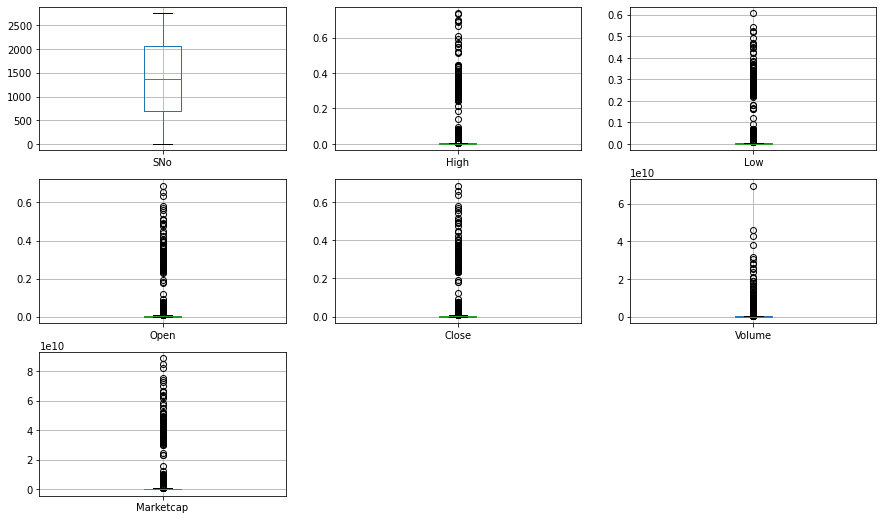

In [5]:
numeric_features = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 9))

for i, col in enumerate(numeric_features):
  plt.subplot(3,3,i+1)
  df.boxplot(column=col)

Dari hasil diatas, beberapa kolom terdapat banyak outlier. outlier dapat diatasi dengan menerapkan methode IQR (metod penghapusan data yang berada pada luar interquartil)

In [6]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
bot_lim = Q1 - 1.5 * IQR
top_lim = Q3 + 1.5 * IQR
df = df[~((df < bot_lim) | (df > top_lim)).any(axis=1)]
df.head()

<ipython-input-6-328e11199333>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < bot_lim) | (df > top_lim)).any(axis=1)]


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


# Univariate Analysis
analisa yang berfokus pada satu variabel yang bertujuan untuk mengidentifikasi dan mengetahui dari karakteristik yang dimiliki

Pada kali ini kita akan memilih fitur Close sebagai acuan dari analisa yang nanti akan dicari beberapa korelasi data pada fitur ini. 

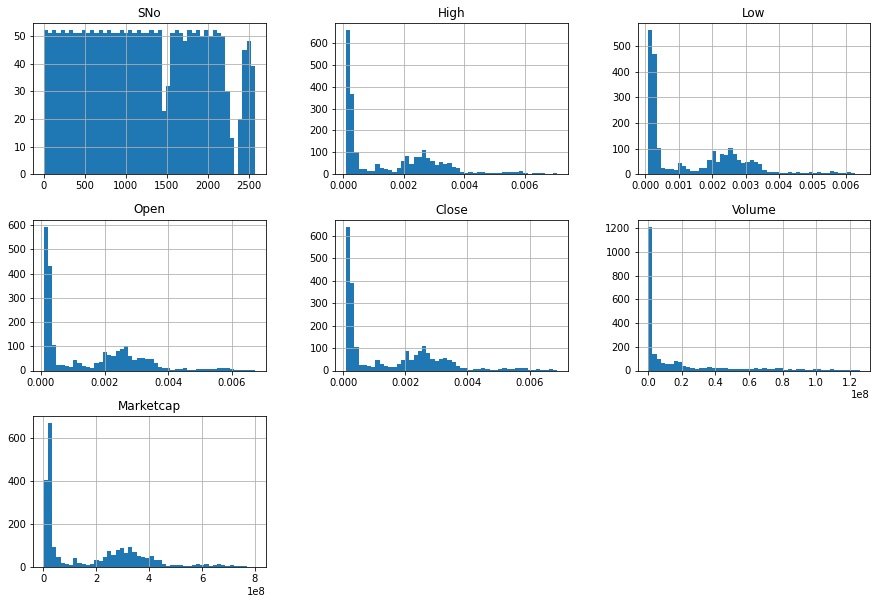

In [7]:
df.hist(bins=50, figsize=(15, 10))
plt.show()

# Multivariate Analysis
Pada analisa sebelumnya kita hanya menganalisa berdasarkan 1 variable saja, pada analisa kali ini kita akan menganalisa serta membandingkan variable dengan variable yang lain

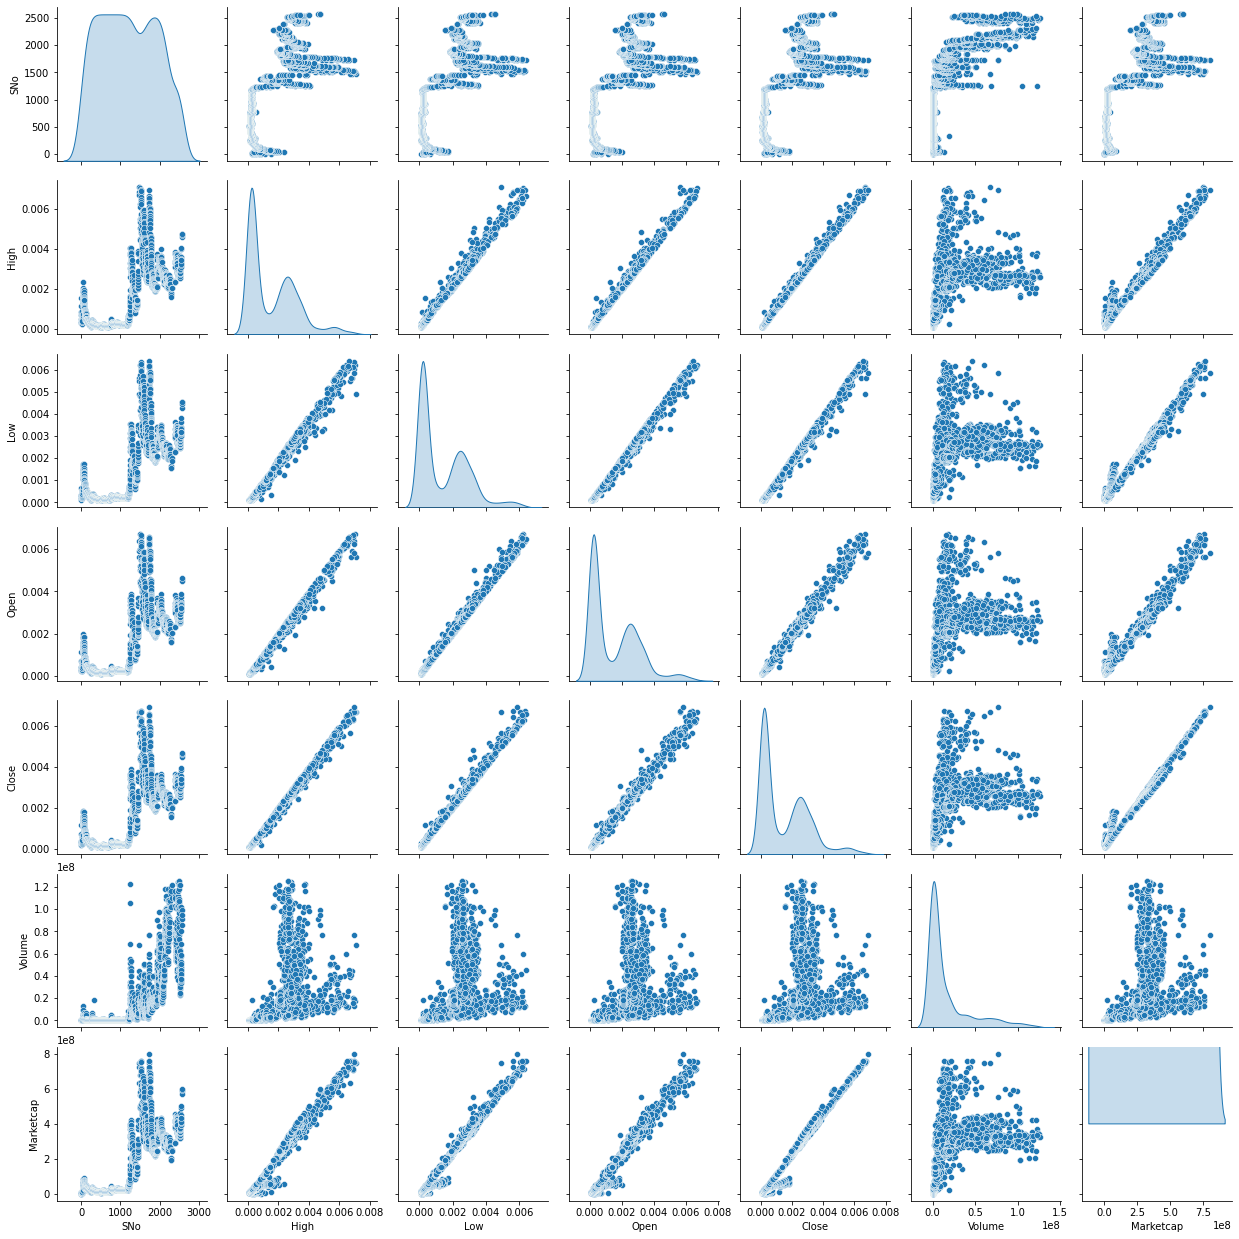

In [8]:
sns.pairplot(df, diag_kind = 'kde')
plt.show()

Dari visualisasi diatas, yang memiliki korelasi dengan fitur Close daintaranya fitur High, Low, Open, dan Marketcap

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,SNo,Name,Symbol,Date,High,Low,Open,Close,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,7.284337e+06
...,...,...,...,...,...,...,...,...,...
2560,2561,Dogecoin,DOGE,2020-12-19 23:59:59,0.004018,0.003810,0.003858,0.003927,5.009820e+08
2569,2570,Dogecoin,DOGE,2020-12-28 23:59:59,0.004716,0.004523,0.004548,0.004592,5.863998e+08
2570,2571,Dogecoin,DOGE,2020-12-29 23:59:59,0.004608,0.004278,0.004592,0.004486,5.730142e+08
2571,2572,Dogecoin,DOGE,2020-12-30 23:59:59,0.004703,0.004453,0.004487,0.004636,5.921138e+08


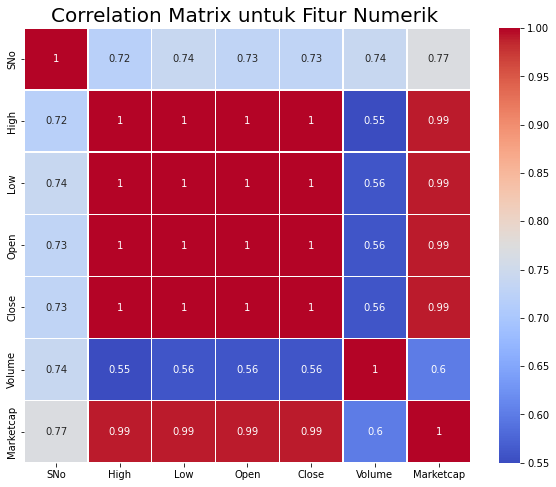

In [9]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

df.drop(['Volume'], axis=1, inplace=True)
df

Pada vsiualisasi di atas memnunjukkan beberapa skor korelasi yang diperoleh pada tiap tiap kolom. Pada fitur High, Low, open, dan Marketcap memiliki skor korelasi yang paling besar. dibanding fitur volume yang memiliki nilai korelasi yang rendah

# Data Preparation
Next, kita akan menghapus beberapa kolom data yang mungkin sudah tidak kita gunakan lagi, dengan harapan agar tidak mengganggu model saat training dimulai

In [10]:
df = df.drop(['SNo', 'Name', 'Symbol', 'Date', 'Marketcap'], axis=1)
df.head()

,High,Low,Open,Close
0,0.000866,0.000150,0.000299,0.000205
1,0.000289,0.000116,0.000207,0.000269
2,0.000362,0.000205,0.000267,0.000362
3,0.001520,0.000328,0.000395,0.001162
4,0.001143,0.000662,0.001143,0.000704


membagi dataset menjadi 2 bagian, data training dan testing

In [33]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

print('Total X_train:', len(X_train), 'records')
print('Total y_train:', len(y_train), 'records')
print('Total X_test:', len(X_test), 'records')
print('Total y_test:', len(y_test), 'records')

Total X_train: 1882 records
Total y_train: 1882 records
Total X_test: 471 records
Total y_test: 471 records


# Data Normalization
Untuk menormalisasikan data yang kita gunakan, kita akan menggunakan MinMaxScaler untuk penerapannya

In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
models = pd.DataFrame(columns=['train_mse', 'test_mse'], index=['KNN', 'SVR', 'RandomForest'])

# Modelling
Implementasi permodelan dengan menggunakan tuning hyperparameter. untuk mendapatkan performa terbaik dari beberapa model.

# KNN

In [23]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsRegressor()

# SVR

In [30]:
svr = SVR(C=100000, gamma=0.003, kernel='rbf')                          
svr.fit(x_train, y_train)

SVR(C=100000, gamma=0.003)

# RandomForest

In [28]:
rf = RandomForestRegressor(n_estimators=6, max_depth=16)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=6)

# Evaluasi Model

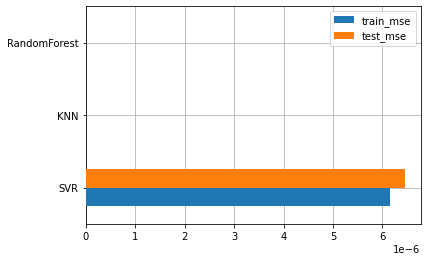

In [31]:
x_test = scaler.transform(x_test)

model_dict = {'KNN': knn, 'RandomForest': rf, 'SVR': svr}

for name, model in model_dict.items():
  models.loc[name, 'train_mse'] = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))
  models.loc[name, 'test_mse'] = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test)) 

models

fig, ax = plt.subplots()
models.sort_values(by='test_mse', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

test_data = x_test.copy()
predictions = {'y_true':y_test}
for name, model in model_dict.items():
  predictions['prediction_' + name] = model.predict(test_data)
 
predictions = pd.DataFrame(predictions)
predictions
plt.show()